**<font size=5>决策树</font>**

与SVM一样，决策树是通用的机器学习算法，可以执行分类和回归任务，甚至可以执行多输出任务。 它们是功能强大的算法，能够拟合复杂的数据集。决策树还是随机森林的基本组成部分，是当今可用的最强大的机器学习算法之一。

在本章中，我们将从讨论如何使用决策树进行训练，可视化和做出预测开始。然后，我们将了解Scikit-Learn使用的CART训练算法，并将讨论如何对树进行正则化并将其用于回归任务。最后，我们将讨论决策树的一些局限性。

**<font size=4>1. 决策树的训练与可视化</font>**

要了解决策树，让我们来构建决策树并看看它如何做出预测。以下代码在iris数据集上训练了DecisionTreeClassifier

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [2]:
iris = load_iris()
X,y = iris.data, iris.target

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
X = X[:, 2:]

In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

可以发现原始的y是按照label大小排序的。

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [8]:
y_test

array([0, 0, 1, 0, 2, 1, 2, 1, 1, 1, 0, 2, 1, 2, 1, 1, 2, 2, 1, 0, 2, 0,
       1, 1, 0, 2, 2, 0, 1, 2, 2, 0, 0, 2, 0, 1, 0, 1])

In [9]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

您可以通过首先使用export_graphviz（）方法输出一个称为iris_tree.dot的图形定义文件来可视化经过训练的决策树：

In [10]:
from sklearn.tree import export_graphviz

In [11]:
export_graphviz(
                tree_clf,
                out_file ="iris_tree.dot",
                feature_names = iris.feature_names[2:],
                class_names = iris.target_names,
                rounded=True,
                filled=True
)

然后，可以使用Graphviz软件包中的dot命令行工具将此.dot文件转换为多种格式，例如PDF或PNG。 此命令行将.dot文件转换为.png图像文件：
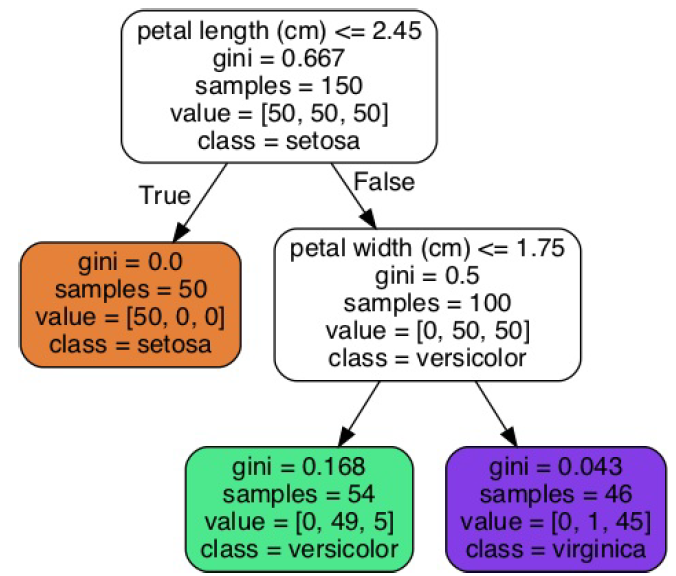

**<font size=4>2. 决策树的预测</font>**

让我们看看上图所示的树是如何进行预测的。假设您找到了一朵鸢尾花，并且想要对其进行分类。从根节点开始（深度为0，在顶部）：该节点询问花朵的花瓣长度是否小于2.45厘米。如果是的话，则向下移动到根的左子节点（深度1，左）。在这种情况下，它是一个叶节点（即，它没有任何子节点），因此它不会提出任何问题：只需查看该节点的预测类，然后决策树就可以预测这朵花是setosa类型的鸢尾花（class = setosa）。<br>
现在，假设发现了另一朵花，这次花瓣的长度大于2.45厘米。必须向下移动到根的右子节点（深度1，右侧），该子节点不是叶节点，因此该节点会问另一个问题：花瓣宽度是否小于1.75厘米？ 如果是，则您的花朵很可能是versicolor类型的鸢尾花（深度2，左）。如果不是，则可能是virginica鸢尾花（深度2，右）。真的就是这么简单。

决策树的许多特质之一就是它们几乎不需要数据准备。实际上，它们根本不需要特征缩放或居中。

节点的samples属性会计算其适用的训练实例数量。例如，100个训练实例的花瓣长度大于2.45厘米（深度1，右），而100个训练实例中的54个花瓣宽度小于1.75厘米（深度2，左）。节点的value属性可告诉您该节点适用于每个类别的训练实例：例如，右下角的节点有0个Setosa鸢尾，1个Versicolor鸢尾和45个Virginica鸢尾。最后，节点的gini属性测量其杂质：如果节点适用的所有训练实例都属于同一类，则该节点为“纯”（gini = 0）。例如，由于depth-1左节点仅适用于Setosa鸢尾花训练实例，因此它是纯净的且其基尼分数为0。如下公式显示了训练算法如何计算i节点的基尼分数Gi。
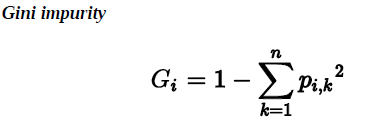

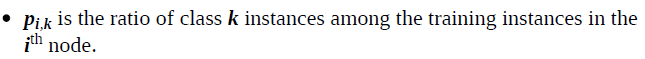

深度-2左节点的基尼分数等于：


**<font color="red">提示：</font>**<br>
Scikit-Learn使用CART算法，该算法仅生成二叉树：非叶节点始终具有两个子节点（即，问题仅包含是/否答案）。但是，其他算法（例如ID3）可以生成具有两个以上子节点的节点的决策树。

下图显示了此决策树的决策边界。粗实线表示根节点的决策边界（深度0）：花瓣长度= 2.45 cm。 由于左侧区域是纯区域（仅Setosa鸢尾），因此无法进一步拆分。但是，右侧区域不纯，因此深度-1的右侧节点在花瓣宽度= 1.75厘米（由虚线表示）时将其拆分。由于max_depth设置为2，因此决策树就在此处停止。如果将max_depth设置为3，则两个depth-2节点将各自添加另一个决策边界（以虚线表示）。
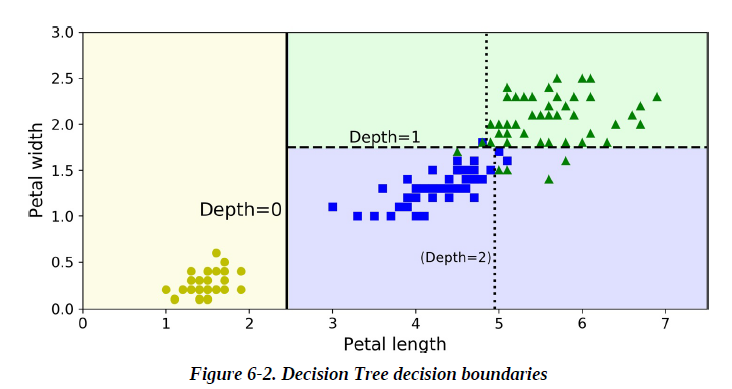

**<font size=4>模型解释：白盒与黑盒</font>**

决策树是直观的，其决策也易于解释。这种模型通常称为白盒模型。相反，正如我们将看到的，通常将随机森林或神经网络视为黑盒模型。他们做出了很好的预测，您可以轻松地检查他们为做出这些预测而执行的计算；但是，通常很难用简单的术语来解释为什么做出预测。例如，如果神经网络说某个人出现在一张图片中，很难知道是什么促成了这一预测：模型是否识别出该人的眼睛？ 他们的嘴？ 他们的鼻子？ 他们的鞋子？ 甚至他们坐在的沙发上？ 相反，决策树提供了不错的、简单的分类规则，如果需要，甚至可以手动应用（例如，用于花卉分类）。

**<font size=4>3. 估计类别概率</font>**

决策树还可以估计实例属于特定类别k的概率。首先，它遍历树以找到该实例的叶节点，然后返回该节点中k类训练实例的比率。

例如，假设您找到了一朵花瓣，花瓣长5厘米，宽1.5厘米。相应的叶节点是depth-2的左节点，因此决策树应输出以下概率：Setosa鸢尾（0/54）为0％，Versicolor鸢尾（49/54）为90.7％，Virginica鸢尾为9.3％（5/54）。而且，如果您要求它预测类别，则应该输出Versicolor鸢尾花（类别1），因为它具有最高的概率。让我们检查一下：

In [12]:
tree_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [13]:
tree_clf.predict([[5,1.5]])

array([1])

In [14]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

完美！请注意，在图6-2的右下角矩形的任何其他地方，估计的概率都相同。
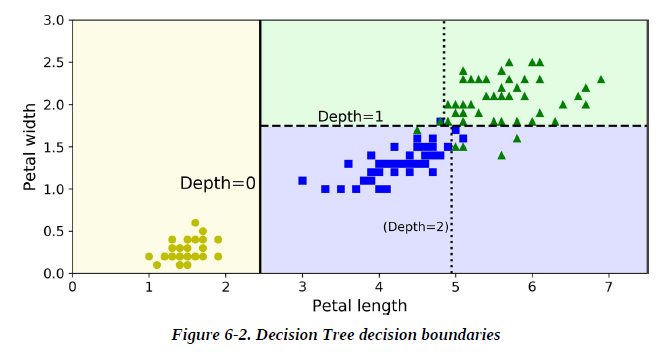

**<font size=4>4. CART算法</font>**

Scikit-Learn使用分类和回归树（CART）算法来训练决策树（也称为“增长”树）。该算法通过首先使用单个特征k和阈值t（例如，“花瓣长度≤2.45 cm”）将训练集分为两个子集来工作。 它如何选择k和t？ 它搜索产生最纯子集（按其大小加权）的对（k，t）。如下给出了算法尝试最小化的代价函数。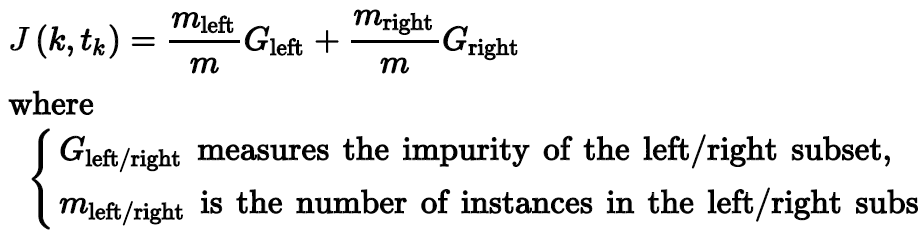

一旦CART算法成功地将训练集分为两部分，它就会使用相同的逻辑将子集进行分割，然后再使用子逻辑进行子集化，依此类推。 一旦达到最大深度（由max_depth超参数定义），或者找不到能够减少杂质的拆分，它将停止递归。 其他一些超参数（稍后描述）控制其他停止条件:(min_samples_split, min_samples_leaf, min_weight_fraction_leaf, and max_leaf_nodes).

如您所见，CART算法是一种贪婪算法：它贪婪地在顶层搜索最佳分割，然后在每个后续级别重复该过程。 它不检查拆分是否将导致最低的不纯度降低几个级别。贪婪算法通常会产生相当好的解决方案，但不能保证是最佳的。不幸的是，已知找到最佳树是一个NP完全问题：它需要O(exp(m))时间，即使对于小型训练集，该问题也很棘手。 这就是为什么我们必须为“合理的好”解决方案做好准备。

**NP完全问题：**<br>
P是可以在多项式时间内解决的一组问题。 NP是可以在多项式时间内验证其解的一组问题。 NP-Hard问题是可以在多项式时间内将任何NP问题减少的问题。一个NP完全问题是NP和NP-Hard。一个主要的开放数学问题是P = NP。 如果P≠NP（这似乎是可能的），那么就不会找到针对任何NP完全问题的多项式算法（也许在量子计算机上除外）。

**<font size=4>5. 计算复杂度</font>**

进行预测需要从根到叶遍历决策树。决策树通常是近似平衡的，因此遍历决策树需要经过大约O(log(m))个节点。 由于每个节点仅需要检查一个特征的值，因此总预测复杂度为O(log(m))，与特征数量无关。因此，即使处理大型训练集，预测也非常快。

训练算法比较每个节点上所有样本上的所有特征（如果设置了max_features，则更少）。比较每个节点上所有样本上的所有特征会导致训练复杂度为O(n×mlog(m))。对于小型训练集（少于几千个实例），Scikit-Learn可以通过对数据进行预排序（集合presort = True）来加快训练速度，但是这样做会大大降低大型训练集的训练速度。

**<font size=4>6. 基尼不纯度(Gini)Or熵(Entropy)</font>**

默认情况下，使用基尼不纯度方法，但是您可以通过将标准超参数criterion设置为“entropy”来选择熵作为不纯度方法。熵的概念起源于热力学，它是对分子无序性的一种度量：当分子静止且有序排列时，熵接近于零。熵后来应用到各种各样的领域，包括Shannon香农的信息论，在该理论中，它测量消息的平均信息内容：当所有消息都相同时，熵为零。在机器学习中，熵通常用作不纯度度量方法：集合仅包含一个类的实例时熵为零。下列公式给出了i节点的熵的定义：
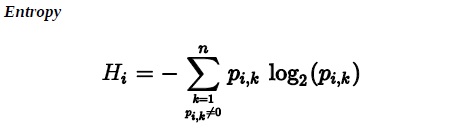

例如，图6-1中depth-2的左节点的熵等于:
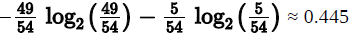

**应该使用基尼不纯度还是熵？**<br>
事实是，在大多数情况下它并没有太大的不同：它们会构成相似的决策树。基尼不纯度的计算速度稍快，因此是一个很好的默认值。但是，当它们不同时，基尼不纯度趋向于在其自己的树的分支中分离出最频繁出现的类别，而熵趋于产生稍微平衡一些的树。

**<font size=4>7. 正则化超参数</font>**

决策树几乎没有关于训练数据的假设（与线性模型相反，线性模型例如假设数据是线性的）。如果不受约束，树结构将适应训练数据，非常紧密地拟合它-实际上，很可能会过度拟合它。这样的模型通常被称为非参数模型，不是因为它没有任何参数（通常有很多），而是因为在训练之前没有确定参数的数量，因此模型结构可以自由地拟合数据。相反，参数模型（例如线性模型）具有预定数量的参数，因此其自由度受到限制，从而降低了过拟合的风险（但增加了欠拟合的风险）

为了避免过度拟合训练数据，您需要在训练过程中限制决策树的自由度。如您现在所知，这称为正则化。正则化超参数取决于所使用的算法，但是通常您至少可以限制决策树的最大深度。在Scikit-Learn中，这由max_depth超参数控制（默认值为None，表示无限制）。减小max_depth将使模型规则化，从而降低过拟合的风险。

**预剪枝：**<br>
DecisionTreeClassifier类还具有其他一些参数，它们类似地限制了决策树的形状：min_samples_split（节点可以拆分之前必须拥有的最小样本数），min_samples_leaf（叶子节点必须具有的最小样本数）， min_weight_fraction_leaf（与min_samples_leaf相同，但表示为加权实例总数的一部分），max_leaf_nodes（最大叶节点数）和max_features（在每个节点处进行分割的最大特征数量）。

**后剪枝：**<br>
其他算法的工作原理是首先无限制地训练决策树，然后修剪（删除）不必要的节点。如果子节点均为叶节点的节点在纯度上没有明显改善，则认为该节点是不必要的。使用标准统计检验（例如χ检验（卡方检验））来估计这种纯度提升是偶然结果的概率（称为零假设）。如果此概率（称为p值）高于给定阈值（通常为5％，由超参数控制），则该节点被认为是不必要的，并删除其子节点。修剪将继续进行，直到修剪掉所有不必要的节点为止。

下图显示了在moons数据集上训练的两个决策树。左侧是使用默认超参数（即无限制）进行训练的决策树，右侧是使用min_samples_leaf = 4进行训练的决策树。显然，左边的模型过度拟合，右边的模型可能会更好地推广。
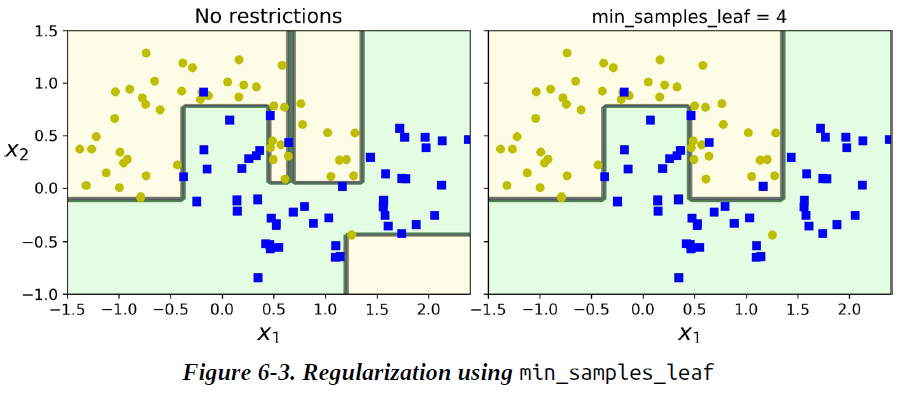

**<font size=4>8. 回归</font>**

决策树还能够执行回归任务。让我们使用Scikit-Learn的DecisionTreeRegressor类构建一个回归树，并在嘈杂的二次数据集上训练该树，其max_depth=2：

In [16]:
from sklearn.tree import DecisionTreeRegressor

In [18]:
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

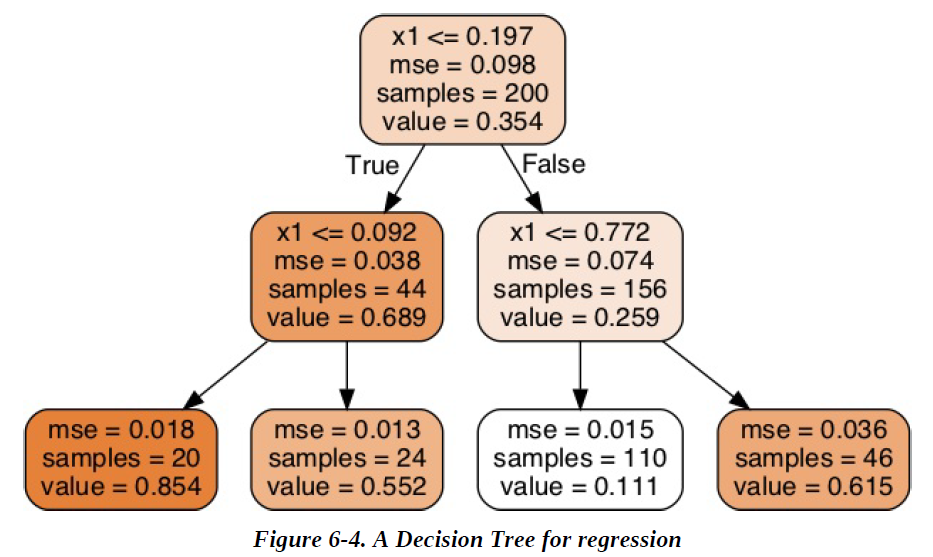

该树看起来与您之前构建的分类树非常相似。主要区别在于，它不是在每个节点中预测类，而是预测一个值。例如，假设您要对x = 0.6的新实例进行预测。您从根开始遍历树，最终到达预测值= 0.111的叶节点。此预测是与此叶节点关联的110个训练实例的平均目标值，并且在这110个实例上得出的均方误差等于0.015。

该模型的预测如下图左侧所示。如果设置max_depth = 3，您将获得右侧所示的预测。请注意，每个区域的预测值总是该区域中实例的平均目标值。该算法以使大多数训练实例尽可能接近该预测值的方式划分每个区域。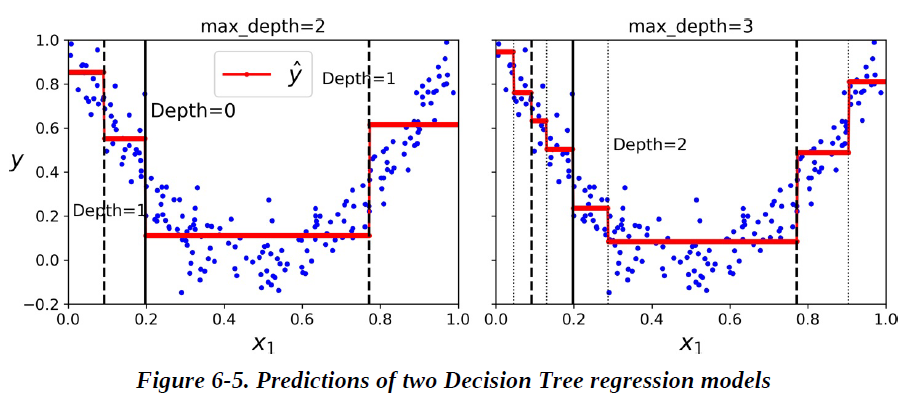

CART算法的工作原理与以前的方法大致相同，不同之处在于，CART算法不是尝试以最小化不纯度的方式拆分训练集，而是尝试以最小化MSE的方式拆分训练集。公式给出了算法尝试最小化的代价函数。
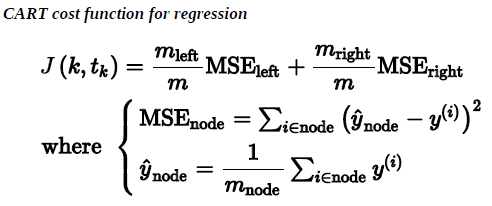

就像分类任务一样，决策树在处理回归任务时容易过拟合。不进行任何正则化（即使用默认的超参数），就获得如图左侧的预测。这些预测显然非常不利于训练集。只需将min_samples_leaf = 10设置为一个更合理的模型即可，如图右侧所示。
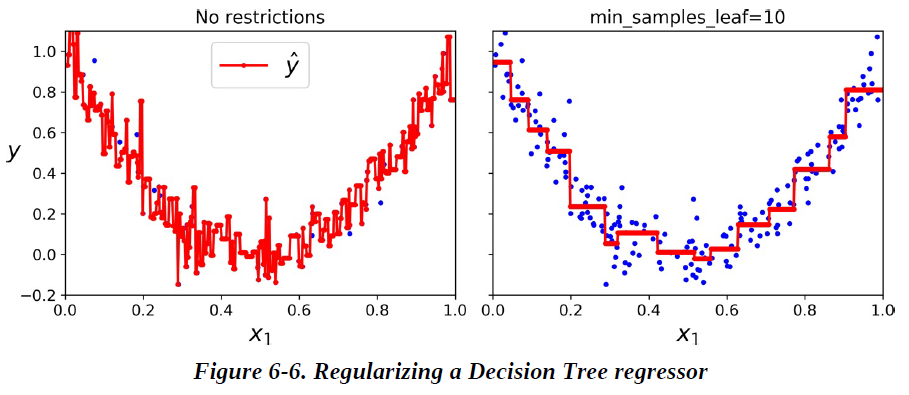

**<font size=4>9. 不稳定性</font>**

希望到目前为止，您已经确信“决策树”有很多用处：它们易于理解和解释，易于使用，用途广泛且功能强大。但是，它们确实有一些限制。首先，您可能已经注意到，决策树喜欢正交的决策边界（所有分割都垂直于轴），这使它们对训练集旋转敏感。例如，下图显示了一个简单的线性可分离数据集：在左侧 ，决策树可以轻松地对其进行拆分，而在右侧，将数据集旋转45°后，决策边界不必要地扭曲。尽管两个决策树都对训练集拟合的很好，但右侧的模型很可能无法很好地推广。 限制此问题的一种方法是使用主成分分析，这通常可以使训练数据的方向更好。
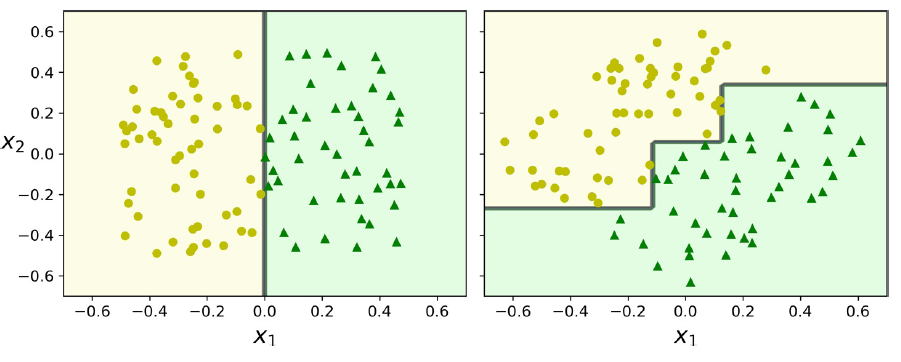

一般而言，决策树的主要问题是它们对训练数据中的细微变化非常敏感。例如，如果只从iris训练集中删除最宽的鸢尾花（花瓣长4.8 cm，宽1.8 cm的Versicolor）并训练新的决策树，则可以得到如图所示的模型。如您所见，它看起来与先前的决策树有很大不同。实际上，由于Scikit-Learn使用的训练算法是随机的，因此即使在相同的训练数据上，您也可能会获得非常不同的模型（除非您设置了random_state超参数）
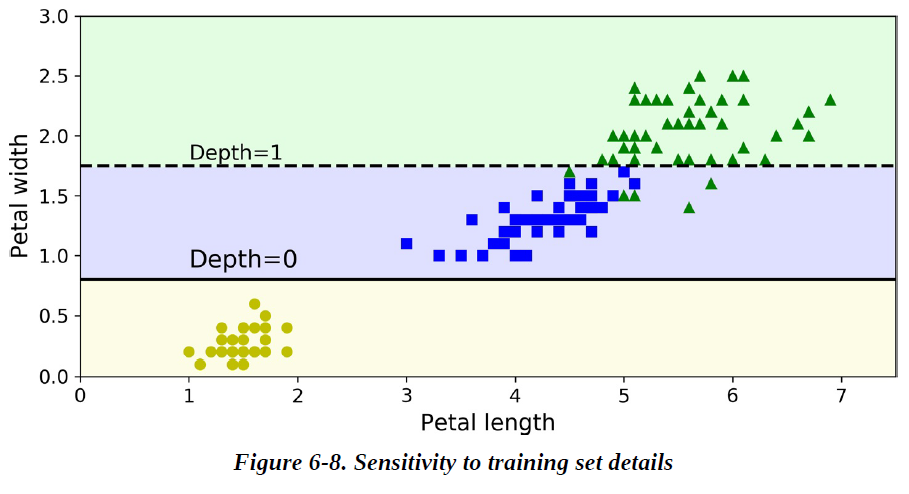

随机森林可以通过对许多树木的平均预测值来限制这种不稳定性，这将在下一章中介绍。